In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier


In [3]:
df = pd.read_csv('/content/bda dataset.csv')

In [4]:
df.shape

(270, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       253 non-null    float64
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  HeartDisease             270 non-null    object 
dtypes: float64(2), int64(11), 

Data preprocessing

In [6]:
mean=df['BP'].mean()
df['BP'].fillna(value=mean,inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    float64
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  HeartDisease             270 non-null    object 
dtypes: float64(2), int64(11), 

In [8]:
df.drop(['Chest pain type', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           270 non-null    int64  
 1   Sex           270 non-null    int64  
 2   BP            270 non-null    float64
 3   Cholesterol   270 non-null    int64  
 4   HeartDisease  270 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 10.7+ KB


In [10]:
df.head()

,Age,Sex,BP,Cholesterol,HeartDisease
0,70,1,130.0,322,Presence
1,67,0,115.0,564,Absence
2,57,1,124.0,261,Presence
3,64,1,128.0,263,Absence
4,74,0,120.0,269,Absence


In [11]:
#Handling categorical feature Heart Diseas
df['HeartDisease'] = df['HeartDisease'].map({'Presence':1,'Absence':0})
df.head()

,Age,Sex,BP,Cholesterol,HeartDisease
0,70,1,130.0,322,1
1,67,0,115.0,564,0
2,57,1,124.0,261,1
3,64,1,128.0,263,0
4,74,0,120.0,269,0


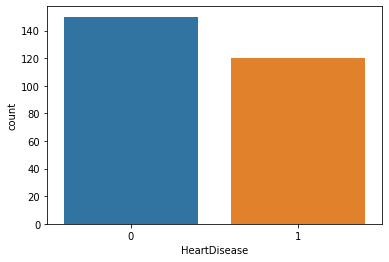

In [12]:
sns.countplot(x='HeartDisease', data=df)

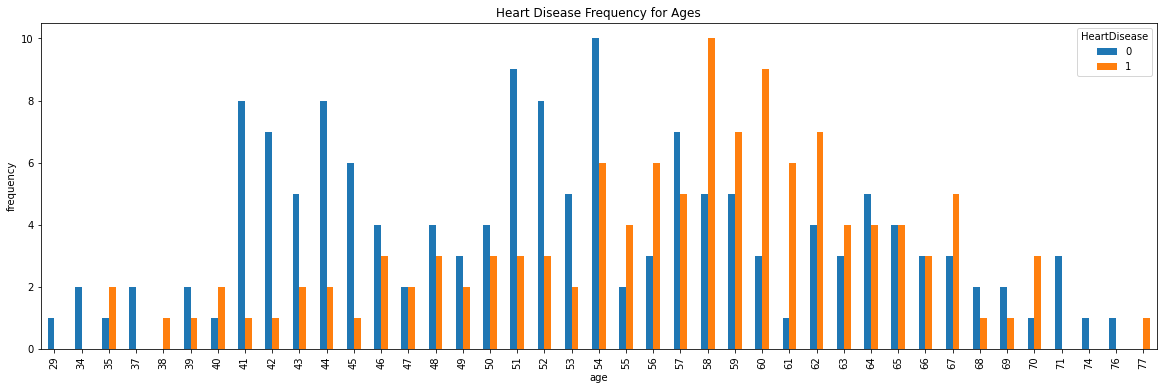

In [13]:
pd.crosstab(df.Age, df.HeartDisease).plot(kind="bar",figsize=(20,6))
plt.title("Heart Disease Frequency for Ages")
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

In [14]:
# Putting feature variable to X
x = df.drop('HeartDisease',axis=1)

# Putting response variable to y
y = df['HeartDisease']

Naive Bayes Algorithm

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)
x_train.shape, x_test.shape


((189, 4), (81, 4))

In [16]:
y_train.shape,y_test.shape

((189,), (81,))

In [17]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [18]:
y_pred=model.predict(x_test)

In [19]:
y_pred

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0])

In [20]:
score_nb = round(accuracy_score(y_pred,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 66.67 %


In [37]:
from sklearn.metrics import precision_score    
precision = precision_score(y_test, y_pred)
print("Precision: ",precision)

Precision:  0.5757575757575758


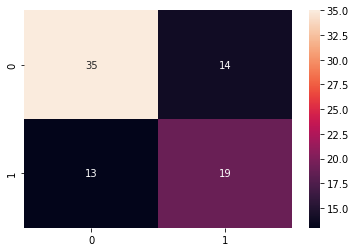

In [21]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,annot = True, fmt = "d")

KNN algorithm

In [23]:
# Splitting the dataset into training and testing sets.
X = df.iloc[:, :-2]
Y = df.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.35)

In [24]:
# Using standard scaler as a standardization technique.
sc_x = StandardScaler()
x_train = sc_x.fit_transform(X_train)
x_test = sc_x.transform(X_test)

In [25]:
# Looking for optimal number of nearest neighbours.
import math
math.sqrt(len(y_test))

9.0

In [26]:
# Creating KNN Model.
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [31]:
Y_pred = classifier.predict(X_test)
Y_pred


array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0])

In [40]:
score_knn = round(accuracy_score(Y_pred,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 49.47 %


In [39]:
from sklearn.metrics import precision_score    
precision = precision_score(Y_test, Y_pred)
print("Precision: ",precision)

Precision:  0.4090909090909091


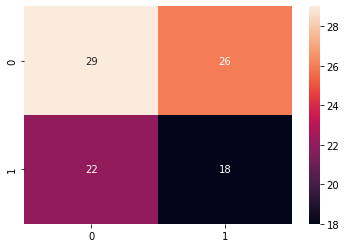

In [ ]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(Y_test, Y_pred)
sns.heatmap(matrix,annot = True, fmt = "d")